# Electricity hourly prices in Estonia

## Introduction
This is an analysis of hourly electricity prices in Estonia through history (from year 2013 on). Analysis is conducted weekday-wise and based on years and months.

The aim is to find general weekly electricity price patterns which could be used to:

1. knowingly direct own's electricity consuming behavour.

2. create cost-effective schedules for a timer to switch on/off a electricity cosuming device (eg. water heater).


Electricity prices given: UTC +1 

Time zones used in Estonia:

End of March - End of October: UTC +2 (Daylight saving time)

End of October - End of March: UTC +3

Prices analysed and given are pure market prices. They are without any taxes, transfer and connectoin fees. To get the final price for the end-user various taxes, transfer and connection fees has to be added (depends from the type of a contract).

### Download data

In [1]:
import urllib.request
import os

#Range of years
years = [2013,2018]

#downloads year file if local file is missing
for year in range(years[0],years[1]+1):
    urlname = "https://www.nordpoolgroup.com/globalassets/marketdata-excel-files/elspot-prices_"+str(year)+"_hourly_eur.xls"
    file_name =  "elspot-prices_"+str(year)+"_hourly_eur.xls"
    if not os.path.isfile(file_name):
        urllib.request.urlretrieve (urlname,file_name)

#file of a last year is downloaded in each run
urlname = "https://www.nordpoolgroup.com/globalassets/marketdata-excel-files/elspot-prices_"+str(years[1])+"_hourly_eur.xls"
file_name =  "elspot-prices_"+str(years[1])+"_hourly_eur.xls"
urllib.request.urlretrieve (urlname,file_name)

('elspot-prices_2018_hourly_eur.xls', <http.client.HTTPMessage at 0x539dd30>)

### Analyze data

Year to be analysed:

In [2]:
target_year = 2018

Convert data:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import calendar

#read in data
file_name =  "elspot-prices_"+str(target_year)+"_hourly_eur.xls"
df_list = pd.read_html(file_name)
df = pd.DataFrame(df_list[0])
df.columns = df.columns.droplevel([0,1]) #remove rows of header
df.rename(columns={'Unnamed: 0_level_2': 'Date'}, inplace=True) #rename date column
#df.head()

#convert date and hour and weekday
df['Date'] = pd.to_datetime(df['Date'], format = "%d-%m-%Y")
df["Hours"] = df["Hours"].str.split("-").str[0]
df["Weekday"] = df['Date'].dt.weekday
df["Month"] = df['Date'].dt.month

#Extract only relevant data
df = df[["Date","Hours","EE","Weekday","Month"]]
#converting price to s/kWh
df["EE_kWh"] = df["EE"]/1000 
#df.head()by_hour = df.groupby(['Weekday', 'Hours']).mean()

#### Analysis by month and weekday

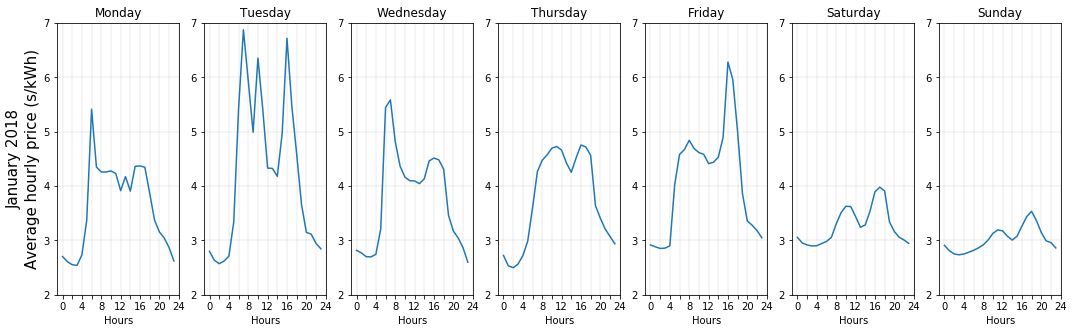

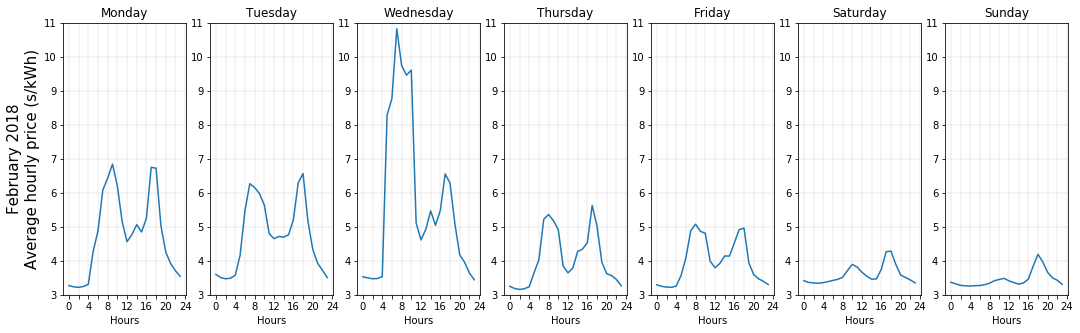

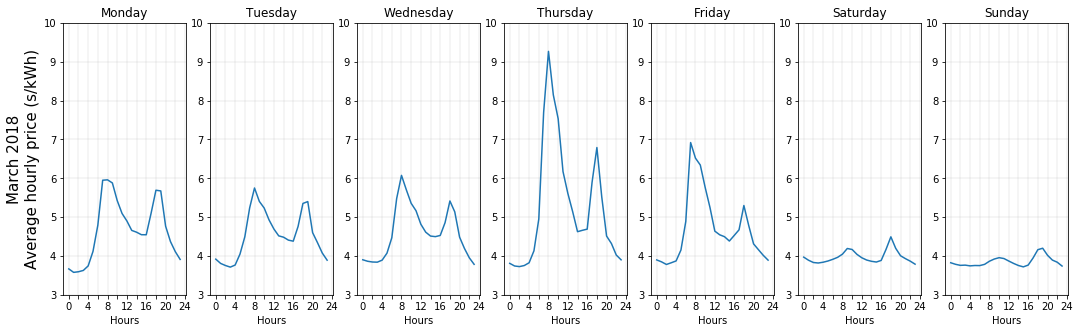

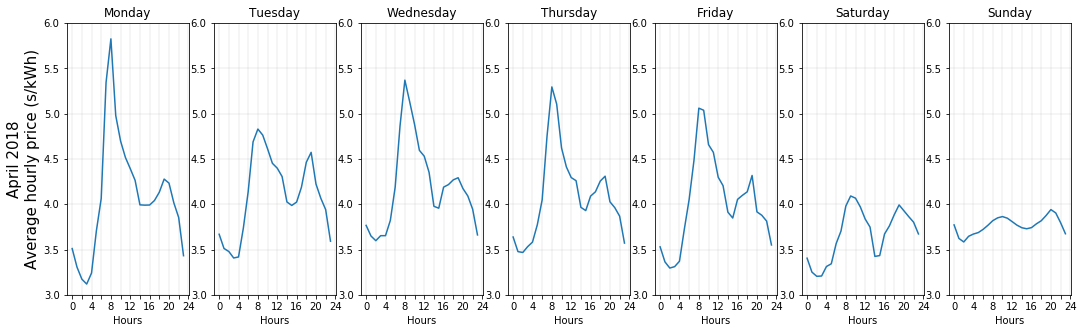

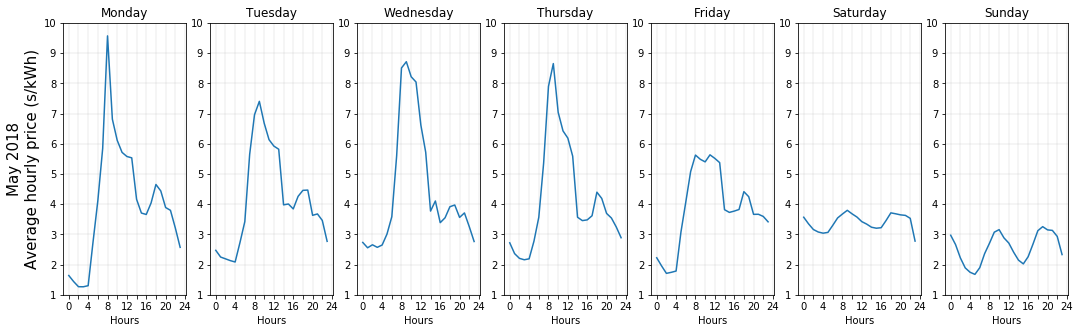

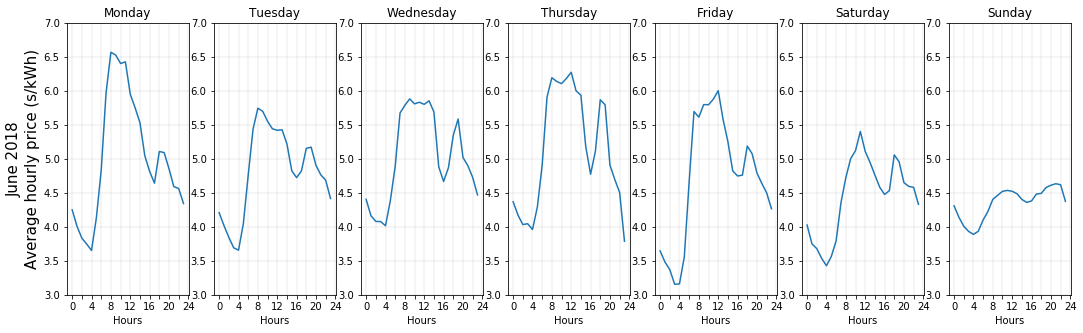

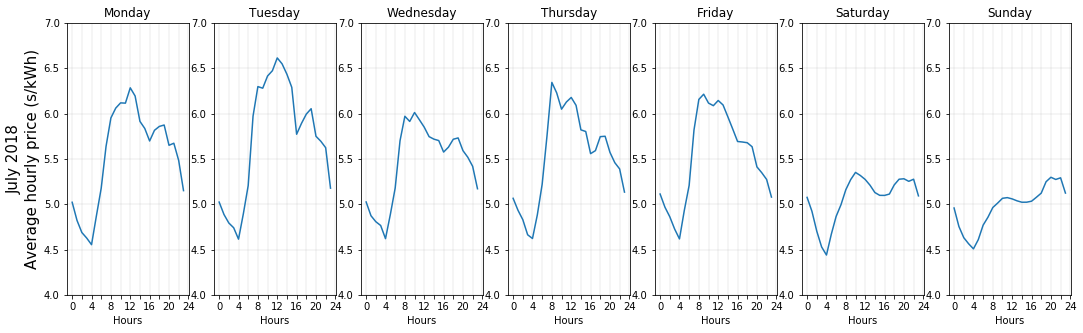

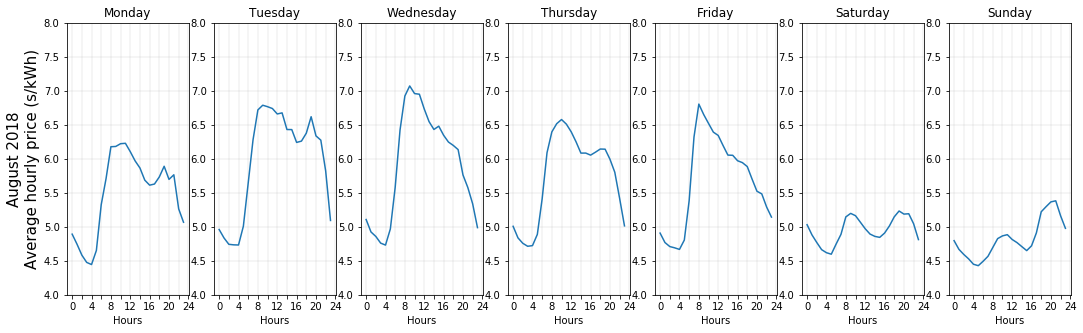

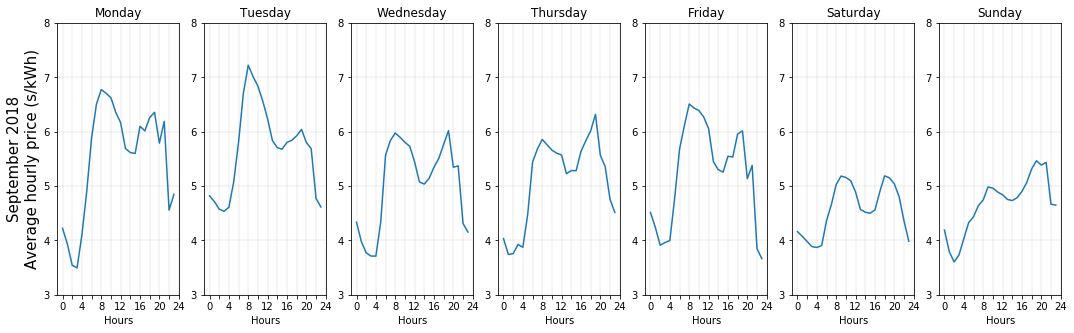

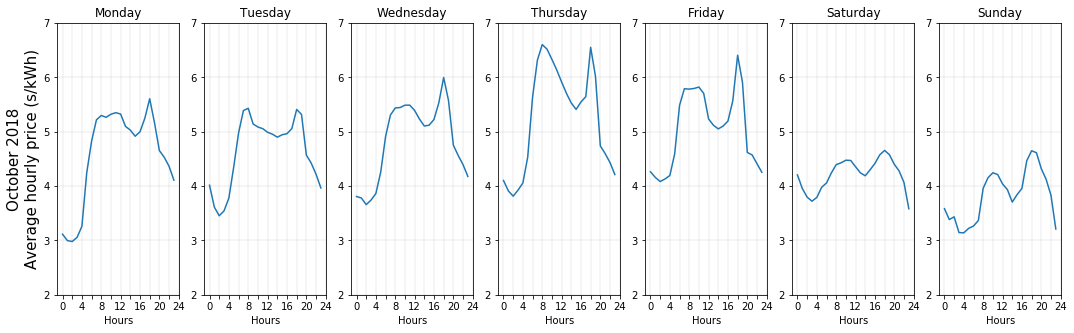

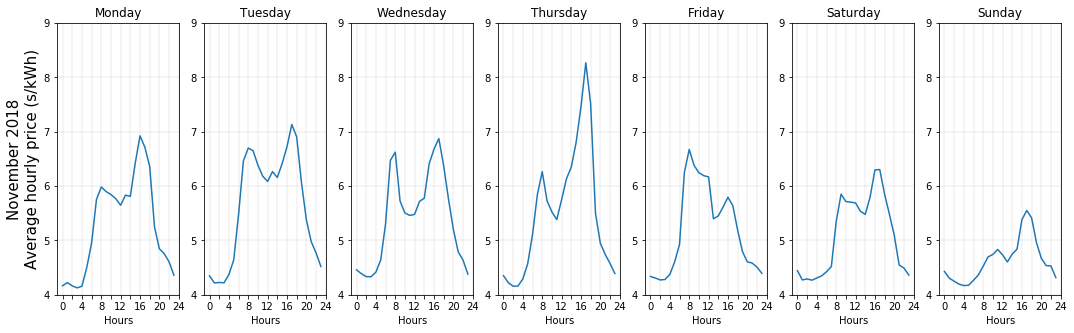

In [4]:
#by month
for j in range(1,df["Month"].max()):
    df_month = df[df["Month"] == j]
    by_hour = df_month.groupby(['Weekday', 'Hours']).mean()
    monthly_max = by_hour["EE_kWh"].max()
    monthly_min = by_hour["EE_kWh"].min()
    fig, ax = plt.subplots(1, 7, figsize=(18, 5))
    hourly_ticks = list(range(0,25,2))
    #Creates tick labels: 0,"",4,"",8,"",...
    hourly_ticks_label = [x*f for x in range(0,25,4) for f in [1,""]]
    for i in range(7):
        by_hour["EE_kWh"][i].plot(ax=ax[i], xticks=hourly_ticks)
        ax[i].set_title(calendar.day_name[i])
        ax[i].set_xticklabels(hourly_ticks_label)
        ax[i].set_ylim([math.floor(monthly_min),math.ceil(monthly_max)])
        if i == 0:
            ax[i].set_ylabel(" ".join([calendar.month_name[j],str(target_year)])+'\nAverage hourly price (s/kWh)',fontsize=15)
        ax[i].grid(True,linewidth=0.25)

#### Analysis of whole year by weekday

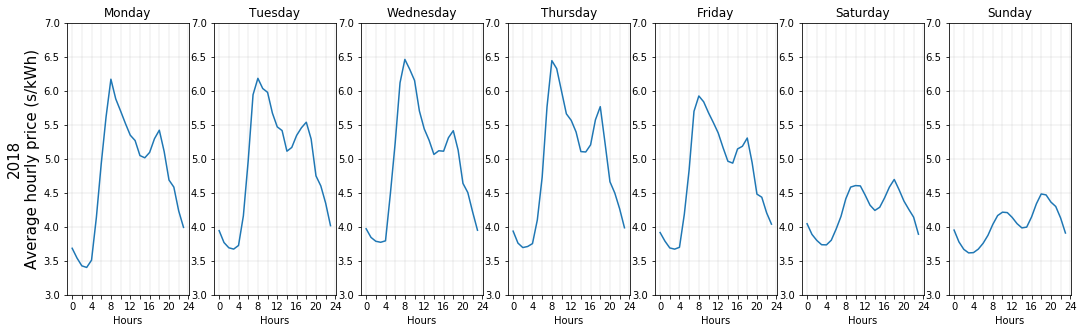

In [5]:
#Take average over weekdays and hours
by_hour = df.groupby(['Weekday', 'Hours']).mean()
yearly_max = by_hour["EE_kWh"].max()
yearly_min = by_hour["EE_kWh"].min()
fig, ax = plt.subplots(1, 7, figsize=(18, 5))
hourly_ticks = list(range(0,25,2))
#Creates tick labels: 0,"",4,"",8,"",...
hourly_ticks_label = [x*f for x in range(0,25,4) for f in [1,""]]
    
for i in range(7):
    by_hour["EE_kWh"][i].plot(ax=ax[i], xticks=hourly_ticks)
    ax[i].set_title(calendar.day_name[i])
    ax[i].set_xticklabels(hourly_ticks_label)
    ax[i].set_ylim([math.floor(yearly_min),math.ceil(yearly_max)])
    if i == 0:
        ax[i].set_ylabel(str(target_year)+'\nAverage hourly price (s/kWh)',fontsize=15)
    ax[i].grid(True,linewidth=0.25)

### Conclusion

Generally there is a two price peaks per day - one in the morning, second on early evening. Therefor it would be wise to switch off electricity consumers during that time.
If you need to use electricity during the day then there is often a period with lower price in afternoon.

In case of water heaters it would be generally wise to switch it only during the nigth. If the water capacity of the water heater is low and hot water does not last till evening it would be wise to switch water heater of also for the afternoon.